### Lead Scoring 

#### - Karishma Velagaleti

In [1]:
# Basic libraries and packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Exploring Agent Data

In [2]:
agent = pd.read_excel('Agent_Activity_Table.xlsx', sheet_name = 'Agent_Activity_Table')
agent.head()

,EmpID,LeadIDCalled,CallStartTime,CallEndTime,OrderID,Revenue
0,1207,393533,2018-12-31 19:51:12.000,2018-12-31 20:00:27.000,30481774.0,113.49
1,976,806783,2019-02-25 10:27:06.495,2019-02-25 10:34:34.695,0.0,0.00
2,543,120666,2018-11-19 12:35:21.445,2018-11-19 12:38:21.445,0.0,0.00
3,976,720610,2019-03-25 06:09:54.359,2019-03-25 06:12:05.759,0.0,0.00
4,81,674727,2019-03-09 23:42:57.578,2019-03-09 23:47:19.778,0.0,0.00


In [3]:
len(agent)

50000

In [4]:
# It looks like some columns do not have NULL values. LeadIDCalled column is in fact not blank as opposed to the 
# PDF. Could this be considered as 0 ?
agent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EmpID          50000 non-null  int64         
 1   LeadIDCalled   50000 non-null  int64         
 2   CallStartTime  50000 non-null  datetime64[ns]
 3   CallEndTime    50000 non-null  datetime64[ns]
 4   OrderID        37445 non-null  float64       
 5   Revenue        37445 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 2.3 MB


In [5]:
# Adding Call Duration Column
agent["CallDuration"] = (agent["CallEndTime"] - agent["CallStartTime"])/np.timedelta64(1, 'm')
agent.head()

,EmpID,LeadIDCalled,CallStartTime,CallEndTime,OrderID,Revenue,CallDuration
0,1207,393533,2018-12-31 19:51:12.000,2018-12-31 20:00:27.000,30481774.0,113.49,9.25
1,976,806783,2019-02-25 10:27:06.495,2019-02-25 10:34:34.695,0.0,0.00,7.47
2,543,120666,2018-11-19 12:35:21.445,2018-11-19 12:38:21.445,0.0,0.00,3.00
3,976,720610,2019-03-25 06:09:54.359,2019-03-25 06:12:05.759,0.0,0.00,2.19
4,81,674727,2019-03-09 23:42:57.578,2019-03-09 23:47:19.778,0.0,0.00,4.37


In [6]:
agent["Call Date"] = agent["CallStartTime"].dt.date

In [7]:
# Checking the range of call duration. Per the data, the calls usually vary between 0-10 min

agent["CallDuration"].describe()

count    50000.000000
mean         4.993512
std          2.881184
min          0.000000
25%          2.500000
50%          4.990000
75%          7.490000
max         10.000000
Name: CallDuration, dtype: float64

In [8]:
# How many rows per lead exist? Why are there are duplicate rows? 
agent[agent["LeadIDCalled"].duplicated()==True].sort_values("LeadIDCalled")

,EmpID,LeadIDCalled,CallStartTime,CallEndTime,OrderID,Revenue,CallDuration,Call Date
28831,1318,0,2018-11-02 01:18:30.467,2018-11-02 01:24:05.867,0.0,0.00,5.59,2018-11-02
35883,1392,0,2019-01-22 06:57:28.758,2019-01-22 07:04:32.958,NaN,NaN,7.07,2019-01-22
35884,857,0,2018-12-02 08:45:50.809,2018-12-02 08:55:36.409,0.0,0.00,9.76,2018-12-02
35885,976,0,2018-12-12 03:07:15.793,2018-12-12 03:12:19.393,0.0,0.00,5.06,2018-12-12
35886,810,0,2018-12-10 23:31:03.434,2018-12-10 23:32:23.234,NaN,NaN,1.33,2018-12-10
...,...,...,...,...,...,...,...,...
13796,301,999476,2019-02-19 13:49:27.724,2019-02-19 13:51:09.124,0.0,0.00,1.69,2019-02-19
23745,301,999476,2019-03-01 22:20:31.245,2019-03-01 22:25:21.045,0.0,0.00,4.83,2019-03-01
23319,1078,999619,2018-11-22 05:38:01.627,2018-11-22 05:38:02.827,72583696.0,3933.97,0.02,2018-11-22
22607,1078,999619,2018-11-06 19:15:22.709,2018-11-06 19:23:40.709,0.0,0.00,8.30,2018-11-06


In [9]:
agent[agent["LeadIDCalled"]==999619]

,EmpID,LeadIDCalled,CallStartTime,CallEndTime,OrderID,Revenue,CallDuration,Call Date
832,1078,999619,2018-11-30 04:34:44.923,2018-11-30 04:42:18.523,55666561.0,5898.73,7.56,2018-11-30
22607,1078,999619,2018-11-06 19:15:22.709,2018-11-06 19:23:40.709,0.0,0.00,8.30,2018-11-06
23319,1078,999619,2018-11-22 05:38:01.627,2018-11-22 05:38:02.827,72583696.0,3933.97,0.02,2018-11-22


In [10]:
# What are the total leads in the data?

len(agent["LeadIDCalled"].unique())

7663

In [11]:
# 50% of agent data suggests no lead was called 

len(agent[agent["LeadIDCalled"]==0])/len(agent)

0.49882

In [12]:
agent[agent["LeadIDCalled"]==0]

,EmpID,LeadIDCalled,CallStartTime,CallEndTime,OrderID,Revenue,CallDuration,Call Date
25059,1325,0,2018-11-24 22:54:14.297,2018-11-24 22:57:52.097,0.0,0.0,3.63,2018-11-24
25060,1240,0,2018-12-01 00:40:10.232,2018-12-01 00:44:04.232,NaN,NaN,3.90,2018-12-01
25061,1325,0,2018-12-12 12:22:18.280,2018-12-12 12:27:25.480,0.0,0.0,5.12,2018-12-12
25062,1392,0,2019-02-07 13:03:03.077,2019-02-07 13:06:26.477,0.0,0.0,3.39,2019-02-07
25063,1318,0,2019-01-06 07:57:44.675,2019-01-06 07:59:45.275,NaN,NaN,2.01,2019-01-06
...,...,...,...,...,...,...,...,...
49995,951,0,2019-01-01 18:35:06.818,2019-01-01 18:35:41.618,0.0,0.0,0.58,2019-01-01
49996,1174,0,2019-01-26 19:33:38.100,2019-01-26 19:36:47.100,NaN,NaN,3.15,2019-01-26
49997,474,0,2019-02-04 05:39:17.250,2019-02-04 05:42:46.650,0.0,0.0,3.49,2019-02-04
49998,857,0,2019-03-20 20:17:07.803,2019-03-20 20:24:19.203,0.0,0.0,7.19,2019-03-20


In [13]:
len(agent[agent["LeadIDCalled"]!=0]["LeadIDCalled"].unique())

7662

In [14]:
# Turns out multiple agents called 1 lead
pd.pivot_table(agent, index="LeadIDCalled", values="EmpID", aggfunc='count')

,EmpID
LeadIDCalled,
0,24941
100299,4
100622,2
100639,5
100656,5
...,...
999290,4
999476,4
999619,3


In [15]:
agent["LeadIDCalled"] = np.where(agent["LeadIDCalled"]==0, np.nan,agent["LeadIDCalled"] )
agent["OrderID"] = np.where(agent["OrderID"]==0.0, np.nan,agent["OrderID"] )
agent["CallDuration"] = np.where(agent["LeadIDCalled"].isna()==True, np.nan,agent["CallDuration"] )

In [16]:
agent[agent["LeadIDCalled"].isna()==True]

,EmpID,LeadIDCalled,CallStartTime,CallEndTime,OrderID,Revenue,CallDuration,Call Date
25059,1325,NaN,2018-11-24 22:54:14.297,2018-11-24 22:57:52.097,NaN,0.0,NaN,2018-11-24
25060,1240,NaN,2018-12-01 00:40:10.232,2018-12-01 00:44:04.232,NaN,NaN,NaN,2018-12-01
25061,1325,NaN,2018-12-12 12:22:18.280,2018-12-12 12:27:25.480,NaN,0.0,NaN,2018-12-12
25062,1392,NaN,2019-02-07 13:03:03.077,2019-02-07 13:06:26.477,NaN,0.0,NaN,2019-02-07
25063,1318,NaN,2019-01-06 07:57:44.675,2019-01-06 07:59:45.275,NaN,NaN,NaN,2019-01-06
...,...,...,...,...,...,...,...,...
49995,951,NaN,2019-01-01 18:35:06.818,2019-01-01 18:35:41.618,NaN,0.0,NaN,2019-01-01
49996,1174,NaN,2019-01-26 19:33:38.100,2019-01-26 19:36:47.100,NaN,NaN,NaN,2019-01-26
49997,474,NaN,2019-02-04 05:39:17.250,2019-02-04 05:42:46.650,NaN,0.0,NaN,2019-02-04
49998,857,NaN,2019-03-20 20:17:07.803,2019-03-20 20:24:19.203,NaN,0.0,NaN,2019-03-20


In [17]:
# Aggregating agent data to a lead ID

agent_pivot = pd.pivot_table(agent, index=["LeadIDCalled"], 
 values=["OrderID", "Revenue", "CallDuration", "CallStartTime","Call Date"], 
 aggfunc={'OrderID': 'count', 'Revenue':np.sum, 'CallDuration':np.sum, 'Call Date':np.max, 'CallStartTime': 'count'}
                            ).reset_index()
agent_pivot.head()

,LeadIDCalled,Call Date,CallDuration,CallStartTime,OrderID,Revenue
0,100299.0,2019-02-28,18.86,4,1,3561.81
1,100622.0,2019-03-12,1.36,2,2,6206.65
2,100639.0,2019-02-27,23.79,5,2,1177.70
3,100656.0,2019-02-05,25.00,5,3,11743.42
4,100659.0,2019-02-10,13.44,3,0,0.00


In [18]:
agent_pivot.rename(columns={'OrderID':'# Orders','Call Date':'Recent Call Date', 'CallStartTime':'Total Calls'}, inplace=True)

In [19]:
agent_pivot.head()

,LeadIDCalled,Recent Call Date,CallDuration,Total Calls,# Orders,Revenue
0,100299.0,2019-02-28,18.86,4,1,3561.81
1,100622.0,2019-03-12,1.36,2,2,6206.65
2,100639.0,2019-02-27,23.79,5,2,1177.70
3,100656.0,2019-02-05,25.00,5,3,11743.42
4,100659.0,2019-02-10,13.44,3,0,0.00


### Exploring data through visuals

<Figure size 720x432 with 0 Axes>

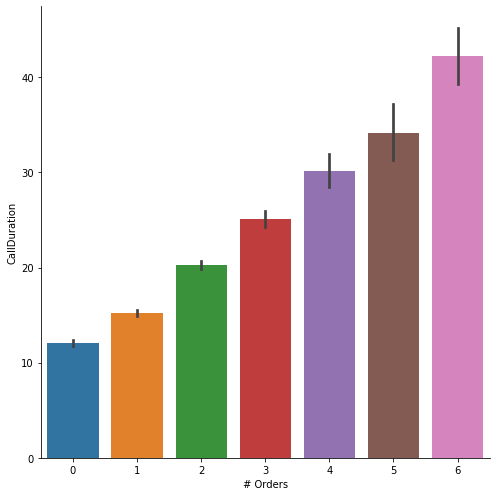

In [20]:
plt.figure(figsize=(10,6))
sns.catplot(data=agent_pivot, x='# Orders', y='CallDuration', kind='bar', height=7)
plt.show()

<Figure size 720x576 with 0 Axes>

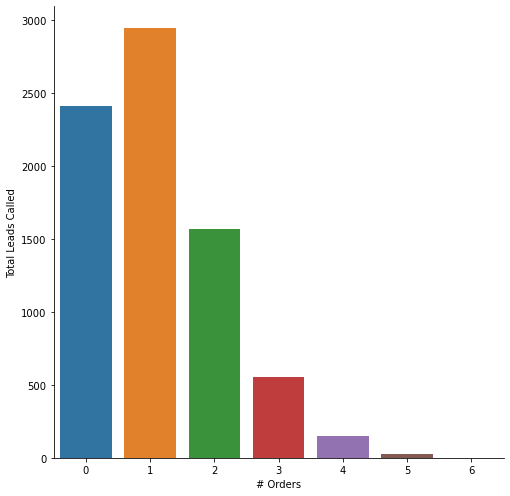

In [21]:
plt.figure(figsize=(10,8))
sns.catplot(data=agent_pivot, x='# Orders', kind='count', height=7)
plt.ylabel("Total Leads Called")
plt.show()

<Figure size 720x576 with 0 Axes>

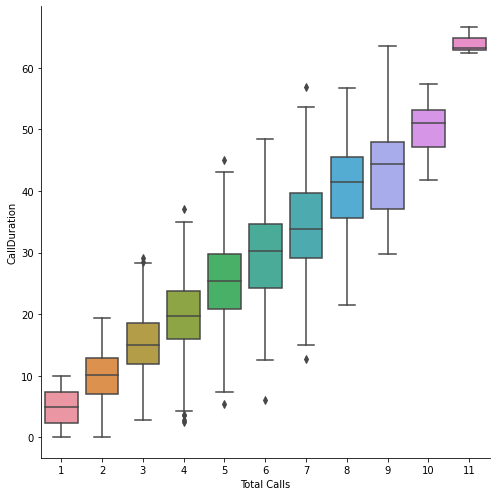

In [22]:
plt.figure(figsize=(10,8))
sns.catplot(data=agent_pivot, x='Total Calls', y='CallDuration', kind='box', height=7)
plt.show()

<Figure size 720x576 with 0 Axes>

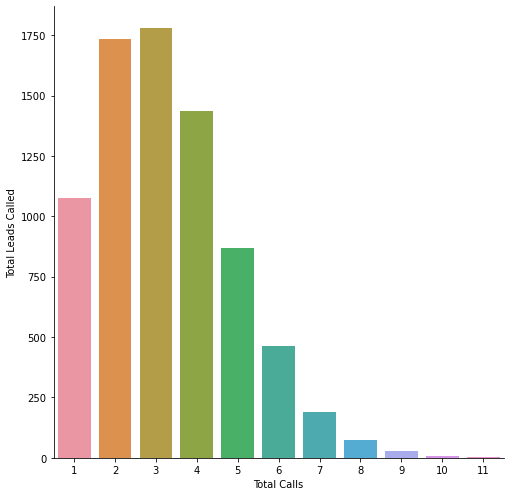

In [23]:
plt.figure(figsize=(10,8))
sns.catplot(data=agent_pivot, x='Total Calls', kind='count', height=7)
plt.ylabel("Total Leads Called")
plt.show()

<Figure size 432x288 with 0 Axes>

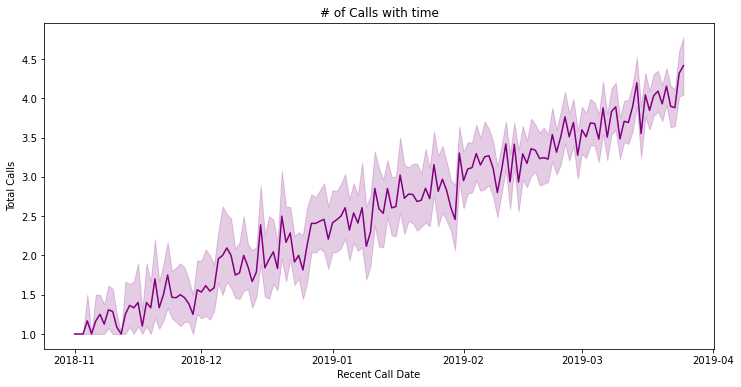

In [24]:
sns.despine(bottom = True, left = True)
plt.figure(figsize=(12,6))
plt.title("# of Calls with time")
sns.lineplot(data=agent_pivot, x='Recent Call Date', y='Total Calls', color='purple')
plt.show()

In [25]:
agent_pivot.describe()

,LeadIDCalled,CallDuration,Total Calls,# Orders,Revenue
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,548495.400418,16.347519,3.270556,1.107805,3318.838645
std,258523.161330,9.778935,1.660609,1.017594,3558.509287
min,100299.000000,0.010000,1.000000,0.000000,0.000000
25%,324363.000000,9.070000,2.000000,0.000000,0.000000
50%,548132.500000,14.940000,3.000000,1.000000,2545.725000
75%,773125.750000,22.217500,4.000000,2.000000,5330.690000
max,999680.000000,66.630000,11.000000,6.000000,23251.710000


### Exploring Lead Data

In [26]:
lead = pd.read_excel('Lead_Table.xlsx', sheet_name = 'Lead_Table')
lead.head()

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId
0,680376,2018-12-20 22:11:35.000,Customer- 2nd Home,44,1,0.0,1
1,200758,2018-11-20 09:05:57.261,Customer- New Home,2,1,0.0,1
2,285305,2019-03-01 04:58:03.097,Out of Stock,95,1,0.0,1
3,323169,2018-11-06 13:15:03.290,Customer- New Home,43,1,0.0,1
4,536574,2018-11-15 01:18:12.935,Out of Stock,2,1,0.0,1


In [27]:
lead[lead["LeadID"]==0]

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId


In [28]:
len(lead["LeadID"].unique())

9974

In [29]:
lead.columns

Index(['LeadID', 'LeadCreationDate', 'LeadType', 'LeadScore', 'Lead Slice',
       '45dayRev', 'LeadOwnerEmpId'],
      dtype='object')

In [30]:
pd.pivot_table(data=lead, columns="Lead Slice", values="LeadID", aggfunc='count')

Lead Slice,0,1
LeadID,8000,1974


In [31]:
# Joining lead and agent data

df = pd.merge(lead, agent_pivot, how='left', left_on="LeadID", right_on="LeadIDCalled")
df.head()

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId,LeadIDCalled,Recent Call Date,CallDuration,Total Calls,# Orders,Revenue
0,680376,2018-12-20 22:11:35.000,Customer- 2nd Home,44,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,200758,2018-11-20 09:05:57.261,Customer- New Home,2,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,285305,2019-03-01 04:58:03.097,Out of Stock,95,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,323169,2018-11-06 13:15:03.290,Customer- New Home,43,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,536574,2018-11-15 01:18:12.935,Out of Stock,2,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pd.pivot_table(df, index="LeadType", columns="Lead Slice", 
    values=["LeadIDCalled", "45dayRev", "# Orders","Revenue", "CallDuration", "Total Calls"], 
    aggfunc={"LeadIDCalled":"count", "45dayRev":np.sum,"# Orders" :[np.sum,np.mean], 
             "Revenue":np.sum, "CallDuration":[np.sum,np.mean], "Total Calls":np.sum})

# Orders                  45dayRev               \
                        mean     sum               sum                
Lead Slice                 0       0    1            0            1   
LeadType                                                              
Customer- 2nd Home  1.123707  2825.0  0.0  6852534.704  1525625.200   
Customer- New Home  1.080110  2737.0  0.0  8321823.320  2310742.400   
Out of Stock        1.119357  2926.0  0.0  8866489.280  2327953.176   

                   CallDuration                LeadIDCalled        Revenue  \
                           mean       sum             count            sum   
Lead Slice                    0         0    1            0  1           0   
LeadType                                                                     
Customer- 2nd Home    16.343787  41088.28  0.0         2514  0  8448081.79   
Customer- New Home    16.220470  41102.67  0.0         2534  0  8221960.07   
Out of Stock          16.474269  43063.74  0.0         2614  0  8758899.84   

                        Total Calls       
                                sum       
Lead Slice            1           0    1  
LeadType                                  
Customer- 2nd Home  0.0      8252.0  0.0  
Customer- New Home  0.0      8221.0  0.0  
Out of Stock        0.0      8586.0  0.0

In [33]:
# Creating some new columns to calculate Agent Cost and VCD 

pd.options.display.float_format = '{:,.1f}'.format
df["AgentCost"] = (df["CallDuration"]/60)*25 # Since the cost per call is $25/hr
df["VCD"] = df["45dayRev"] - df["AgentCost"]

In [34]:
df[df["45dayRev"]==0.0]

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId,LeadIDCalled,Recent Call Date,CallDuration,Total Calls,# Orders,Revenue,AgentCost,VCD
0,680376,2018-12-20 22:11:35.000,Customer- 2nd Home,44,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
1,200758,2018-11-20 09:05:57.261,Customer- New Home,2,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
2,285305,2019-03-01 04:58:03.097,Out of Stock,95,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
3,323169,2018-11-06 13:15:03.290,Customer- New Home,43,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
4,536574,2018-11-15 01:18:12.935,Out of Stock,2,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,209369,2018-12-07 07:48:19.577,Out of Stock,24,0,0.0,1436,"209,369.0",2018-11-29,0.8,1.0,0.0,0.0,0.3,-0.3
9964,680345,2019-01-11 07:19:09.762,Customer- New Home,70,0,0.0,81,"680,345.0",2019-01-06,2.5,2.0,0.0,0.0,1.1,-1.1
9970,190930,2019-01-16 17:41:21.811,Customer- New Home,16,0,0.0,1465,"190,930.0",2019-03-06,24.4,4.0,0.0,0.0,10.1,-10.1
9971,378994,2018-11-25 01:16:07.280,Out of Stock,64,0,0.0,1325,"378,994.0",2019-03-08,6.2,2.0,0.0,0.0,2.6,-2.6


In [35]:
df.head()

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId,LeadIDCalled,Recent Call Date,CallDuration,Total Calls,# Orders,Revenue,AgentCost,VCD
0,680376,2018-12-20 22:11:35.000,Customer- 2nd Home,44,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
1,200758,2018-11-20 09:05:57.261,Customer- New Home,2,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
2,285305,2019-03-01 04:58:03.097,Out of Stock,95,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
3,323169,2018-11-06 13:15:03.290,Customer- New Home,43,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan
4,536574,2018-11-15 01:18:12.935,Out of Stock,2,1,0.0,1,nan,NaN,nan,nan,nan,nan,nan,nan


In [36]:
pd.pivot_table(df, index="LeadType", columns="Lead Slice", 
               values=["LeadID","LeadIDCalled", "45dayRev","VCD", "CallDuration", "AgentCost"], 
              aggfunc={"LeadID": 'count', "LeadIDCalled":"count", "45dayRev":np.sum,
                       "VCD" :[np.sum,np.mean], "CallDuration":[np.sum,np.mean], 
                      "AgentCost":np.sum})

45dayRev             AgentCost     CallDuration  \
                           sum                   sum             mean   
Lead Slice                   0           1         0   1            0   
LeadType                                                                
Customer- 2nd Home 6,852,534.7 1,525,625.2  17,120.1 0.0         16.3   
Customer- New Home 8,321,823.3 2,310,742.4  17,126.1 0.0         16.2   
Out of Stock       8,866,489.3 2,327,953.2  17,943.2 0.0         16.5   

                                LeadID      LeadIDCalled        VCD  \
                        sum      count             count       mean   
Lead Slice                0   1      0    1            0  1       0   
LeadType                                                              
Customer- 2nd Home 41,088.3 0.0   2633  612         2514  0 2,681.5   
Customer- New Home 41,102.7 0.0   2645  650         2534  0 3,237.9   
Out of Stock       43,063.7 0.0   2722  712         2614  0 3,343.9   

                                    
                           sum      
Lead Slice                   0   1  
LeadType                            
Customer- 2nd Home 6,741,345.3 0.0  
Customer- New Home 8,204,834.0 0.0  
Out of Stock       8,740,956.6 0.0

In [37]:
df[df["LeadIDCalled"].isna()==False]

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId,LeadIDCalled,Recent Call Date,CallDuration,Total Calls,# Orders,Revenue,AgentCost,VCD
2312,997865,2019-01-10 00:08:12.478,Out of Stock,52,0,"1,889.2",951,"997,865.0",2019-03-02,6.9,3.0,2.0,"1,889.2",2.9,"1,886.3"
2313,811632,2018-12-31 19:04:00.142,Customer- New Home,69,0,"1,789.1",796,"811,632.0",2019-02-01,3.1,1.0,1.0,"1,789.1",1.3,"1,787.8"
2314,917203,2018-11-18 23:30:07.640,Customer- New Home,67,0,0.0,810,"917,203.0",2019-01-01,8.7,2.0,0.0,0.0,3.6,-3.6
2315,958500,2018-11-24 03:20:42.172,Out of Stock,69,0,0.0,199,"958,500.0",2019-03-07,13.2,3.0,0.0,0.0,5.5,-5.5
2316,157196,2018-11-20 23:50:34.076,Customer- New Home,42,0,"5,923.4",1411,"157,196.0",2019-03-11,23.5,4.0,2.0,"5,923.4",9.8,"5,913.6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,627667,2018-11-07 23:17:45.101,Customer- New Home,79,0,"4,682.5",1436,"627,667.0",2019-01-29,16.4,3.0,2.0,"4,682.5",6.8,"4,675.7"
9970,190930,2019-01-16 17:41:21.811,Customer- New Home,16,0,0.0,1465,"190,930.0",2019-03-06,24.4,4.0,0.0,0.0,10.1,-10.1
9971,378994,2018-11-25 01:16:07.280,Out of Stock,64,0,0.0,1325,"378,994.0",2019-03-08,6.2,2.0,0.0,0.0,2.6,-2.6
9972,706644,2018-11-25 11:57:50.518,Customer- 2nd Home,4,0,0.0,1465,"706,644.0",2019-01-11,8.7,1.0,0.0,0.0,3.6,-3.6


In [38]:
# Exploring some more data 

ld = pd.pivot_table(df, index="LeadIDCalled", values=['AgentCost', '45dayRev', 'VCD'], 
                     aggfunc={'AgentCost':np.sum, '45dayRev':np.sum, 'VCD':np.sum}).reset_index()


In [39]:
ld.sort_values(by="VCD", ascending=False)

,LeadIDCalled,45dayRev,AgentCost,VCD
5300,"722,002.0","23,146.8",7.9,"23,138.9"
3971,"563,825.0","20,364.9",12.9,"20,352.0"
3831,"548,147.0","20,214.5",11.9,"20,202.6"
2361,"377,207.0","20,083.1",13.5,"20,069.7"
589,"168,650.0","18,967.9",8.7,"18,959.2"
...,...,...,...,...
1629,"290,528.0",0.0,19.0,-19.0
3228,"477,433.0",0.0,19.8,-19.8
3425,"499,767.0",0.0,20.0,-20.0
776,"192,604.0",0.0,20.2,-20.2


In [40]:
len(ld[ld["VCD"]<0])

2415

In [41]:
ld[ld["VCD"]>0]

,LeadIDCalled,45dayRev,AgentCost,VCD
0,"100,299.0","2,849.4",7.9,"2,841.6"
1,"100,622.0","6,206.6",0.6,"6,206.1"
2,"100,639.0","1,177.7",9.9,"1,167.8"
3,"100,656.0","11,743.4",10.4,"11,733.0"
7,"101,295.0","4,062.2",2.8,"4,059.4"
...,...,...,...,...
7656,"999,282.0","3,152.2",11.2,"3,141.0"
7657,"999,290.0","1,373.2",6.8,"1,366.4"
7658,"999,476.0","1,831.2",6.0,"1,825.2"
7659,"999,619.0","7,866.2",6.6,"7,859.5"


In [42]:
ld.sum()

LeadIDCalled   4,202,571,758.0
45dayRev          23,739,325.3
AgentCost             52,189.5
VCD               23,687,135.9
dtype: float64

In [43]:
# VCD is negative - this means there was little to no revenue from these leads but 
# the cost associated with the leads = agent hourly cost 

df[(df["VCD"]<0)][["45dayRev","AgentCost", "VCD"]].sum()

45dayRev          1.7
AgentCost    12,158.4
VCD         -12,156.7
dtype: float64

In [46]:
df[(df["VCD"]>=0)][["45dayRev","AgentCost", "VCD"]].sum()

45dayRev    23,739,323.6
AgentCost       40,031.0
VCD         23,699,292.6
dtype: float64

In [51]:
# Per the pivot table below, we can see that 45-day revenue is greater than what we see in the 
# cell above. This is happening because there are a few leads that sales has not called yet which is 
# giving positive 45 day revenue 

pd.pivot_table(data=df, index="Lead Slice", values="45dayRev", aggfunc=np.sum)

,45dayRev
Lead Slice,
0,"24,040,847.3"
1,"6,164,320.8"


In [49]:
df[(df["VCD"]<0)]

,LeadID,LeadCreationDate,LeadType,LeadScore,Lead Slice,45dayRev,LeadOwnerEmpId,LeadIDCalled,Recent Call Date,CallDuration,Total Calls,# Orders,Revenue,AgentCost,VCD
2314,917203,2018-11-18 23:30:07.640,Customer- New Home,67,0,0.0,810,"917,203.0",2019-01-01,8.7,2.0,0.0,0.0,3.6,-3.6
2315,958500,2018-11-24 03:20:42.172,Out of Stock,69,0,0.0,199,"958,500.0",2019-03-07,13.2,3.0,0.0,0.0,5.5,-5.5
2319,240209,2019-01-16 00:07:34.522,Customer- 2nd Home,85,0,0.0,543,"240,209.0",2019-03-10,13.8,3.0,0.0,0.0,5.8,-5.8
2321,507636,2018-12-13 11:43:07.759,Customer- New Home,22,0,0.0,81,"507,636.0",2019-03-20,4.4,1.0,0.0,0.0,1.8,-1.8
2328,640789,2019-03-23 20:58:43.273,Customer- 2nd Home,20,0,0.0,888,"640,789.0",2019-03-02,9.3,1.0,0.0,0.0,3.9,-3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,209369,2018-12-07 07:48:19.577,Out of Stock,24,0,0.0,1436,"209,369.0",2018-11-29,0.8,1.0,0.0,0.0,0.3,-0.3
9964,680345,2019-01-11 07:19:09.762,Customer- New Home,70,0,0.0,81,"680,345.0",2019-01-06,2.5,2.0,0.0,0.0,1.1,-1.1
9970,190930,2019-01-16 17:41:21.811,Customer- New Home,16,0,0.0,1465,"190,930.0",2019-03-06,24.4,4.0,0.0,0.0,10.1,-10.1
9971,378994,2018-11-25 01:16:07.280,Out of Stock,64,0,0.0,1325,"378,994.0",2019-03-08,6.2,2.0,0.0,0.0,2.6,-2.6


In [45]:
# Exporting the file to visualize and analyze further

df.to_excel('Leads Analysis.xlsx')